In [1]:
!wget https://raw.githubusercontent.com/perryism/machine_learning_101/master/data/imdb_labelled.txt -O /tmp/imdb.csv

--2019-07-31 00:32:51--  https://raw.githubusercontent.com/perryism/machine_learning_101/master/data/imdb_labelled.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.24.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.24.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85285 (83K) [text/plain]
Saving to: ‘/tmp/imdb.csv’

/tmp/imdb.csv       100%[===================>]  83.29K  --.-KB/s    in 0.05s   

2019-07-31 00:32:52 (1.52 MB/s) - ‘/tmp/imdb.csv’ saved [85285/85285]



# Reference

[sklearn doc](https://scikit-learn.org/stable/modules/classes.html)

# Load data

In [2]:
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML 
import sys
sys.path.append("..")
from lib import is_rotten, predict, plot_confusion_matrix, Sentiment

import warnings
warnings.filterwarnings('ignore')

reviews = pd.read_csv('/tmp/imdb.csv', sep="\t", header=None)
reviews.columns = ['review', 'like']

# Split data
from sklearn.model_selection import train_test_split

X_raw_train, X_raw_test, y_train, y_test = train_test_split(reviews['review'], reviews['like'], test_size=0.33, random_state=42)



# Explore

real world problems: not clean, messy, for example, voicebase, transcript not accurate. 

In [3]:
from IPython.display import display
pd.set_option('display.max_colwidth', -1)
with pd.option_context("display.max_rows", reviews.shape[0]):
    display(reviews)

review  \
0    A very, very, very slow-moving, aimless movie about a distressed, drifting young man.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

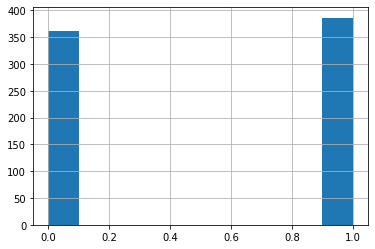

In [4]:
%matplotlib inline
reviews['like'].hist()

# How would you do it?

In [5]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
from toolz import curry

@curry
def is_good(positive_words, review):
    lower_quote = review.lower()
    for positive_word in positive_words:
        if positive_word.lower() in lower_quote:
            return 1

    return 0

def predict(df, positive_words):
    good_func = is_good(positive_words)
    return df.apply(good_func)

#try adding 'excellent' to the list
positive_words = ['good']

y_predict = predict(X_raw_train, positive_words)
accuracy_score(y_train, y_predict)

0.4930139720558882

# Machine learning approach



In [6]:
# DEMO

s = Sentiment.demo()
s.predict("This movie is boring")

0

In [7]:
# bag of words
 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 
m = vectorizer.fit_transform(["The quick brown fox jumps over the lazy dog"]).todense()
f = vectorizer.get_feature_names()
pd.concat([pd.DataFrame(m), pd.DataFrame(f).T])

0    1    2      3     4     5      6    7
0  1      1    1    1      1     1     1      2  
0  brown  dog  fox  jumps  lazy  over  quick  the

In [8]:
vectorizer.transform(["The fox is in the box"]).todense()

matrix([[0, 0, 1, 0, 0, 0, 0, 2]])

# Movie review

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews['review'])
y = reviews['like']

# Common Terminologies
- X  features

- y  labels

In [25]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression is a classifer. checkout https://en.wikipedia.org/wiki/Logistic_regression for more details

clf = LogisticRegression(C=0.5)
clf.fit(X, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_predict = clf.predict(X)
print(accuracy_score(y, y_predict))

0.9518716577540107


## It looks so good

## Can we say our model is very accurate?  

## Or is it really? What is wrong?

# Memorization vs Learning

In [27]:
from sklearn.model_selection import train_test_split

X_raw_train, X_raw_test, y_train, y_test = train_test_split(reviews['review'], reviews['like'], test_size=0.33, random_state=42)

clf.fit(vectorizer.transform(X_raw_train), y_train)
y_predict = clf.predict(vectorizer.transform(X_raw_test))

from sklearn.metrics import f1_score, accuracy_score, classification_report
print(accuracy_score(y_test, y_predict))

0.659919028340081


# Find the right measurement

In [28]:
y_predict = clf.predict(vectorizer.transform(X_raw_test))

from sklearn.metrics import f1_score, accuracy_score, classification_report
print(accuracy_score(y_test, y_predict))

0.659919028340081


In [29]:
# Imagine you are writing a spam filter, and the samples you collected are mostly ham.

y_true = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1]

# We can have the model ALWAYS returns 0s
y_predict = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

print(accuracy_score(y_true, y_predict))

0.9090909090909091


In [30]:
# What is precision? What is recall?

Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png")

In [31]:
# f1 score takes consideration of both precision and recall

Image(url="https://wikimedia.org/api/rest_v1/media/math/render/svg/057ffc6b4fa80dc1c0e1f2f1f6b598c38cdd7c23")

In [32]:
y_predict = clf.predict(vectorizer.transform(X_raw_test))

from sklearn.metrics import f1_score, accuracy_score, classification_report
print(accuracy_score(y_test, y_predict))
print(f1_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.659919028340081
0.7341772151898734
              precision    recall  f1-score   support

           0       0.90      0.37      0.53       126
           1       0.59      0.96      0.73       121

    accuracy                           0.66       247
   macro avg       0.75      0.67      0.63       247
weighted avg       0.75      0.66      0.63       247



# Confusion matrix

precision/recall trade off

eg. if you are writing a parental control filter for children, you probably want high precision.

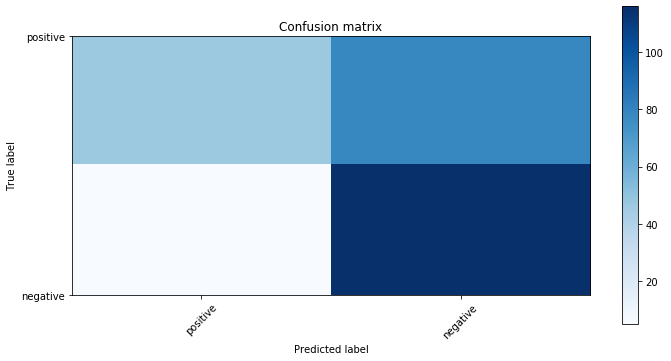

In [33]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pylab as plt
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(10,5))
plot_confusion_matrix(cm)

In [34]:
import numpy as np
result = pd.DataFrame(np.array([y_predict, y_test]).T, columns=['predict', 'actual'])
compare = pd.concat([result, X_raw_test.reset_index()['review']], axis=1)

compare.query("actual == 1").head(50)

predict  actual  \
3    1        1        
4    1        1        
7    1        1        
9    1        1        
11   1        1        
14   1        1        
16   1        1        
20   1        1        
21   1        1        
25   0        1        
26   1        1        
30   1        1        
32   1        1        
33   1        1        
36   1        1        
37   1        1        
41   1        1        
47   1        1        
49   1        1        
50   1        1        
51   1        1        
54   1        1        
61   1        1        
62   1        1        
63   1        1        
67   1        1        
68   1        1        
69   0        1        
70   1        1        
71   1        1        
73   1        1        
75   1        1        
78   1        1        
81   1        1        
83   1        1        
84   0        1        
85   1        1        
86   1        1        
87   1        1        
89   1        1        
90   1        1        
91   1        1        
92   1        1        
95   1        1        
97   1        1        
101  1        1        
103  1        1        
104  1        1        
106  1        1        
107  1        1        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              review  
3    My 8/10 score is mostly for the plot.                                                                                                                                                                                                                                                                                                                                                                                                                                                            
4    I found this move beautiful, enjoyable, and uplifting.                                                                                                                                                                                                                                                                                                                                                                                                                                           
7    I would give this television series a 10 plus if i could.                                                                                                                                                                                                                                                                                                                                                                                                                                        
9    ;) Recommend with confidence!                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
11   Cinematography noteworthy including fine views of Barcelona and its famed Gaudi towers.                                                                                                                                                                                                                                                             

# Test the model we just created

In [35]:
my_review = "this is so boring"
Sentiment(vectorizer, clf).predict(my_review)

# for debug
#clf.coef_[0, vectorizer.vocabulary_.get('movie')]

0

In [36]:
# What else can we try?  
# TfidfVectorizer
# TfidfVectorizer(stop_words='english')

(-0.5, 399.5, 199.5, -0.5)

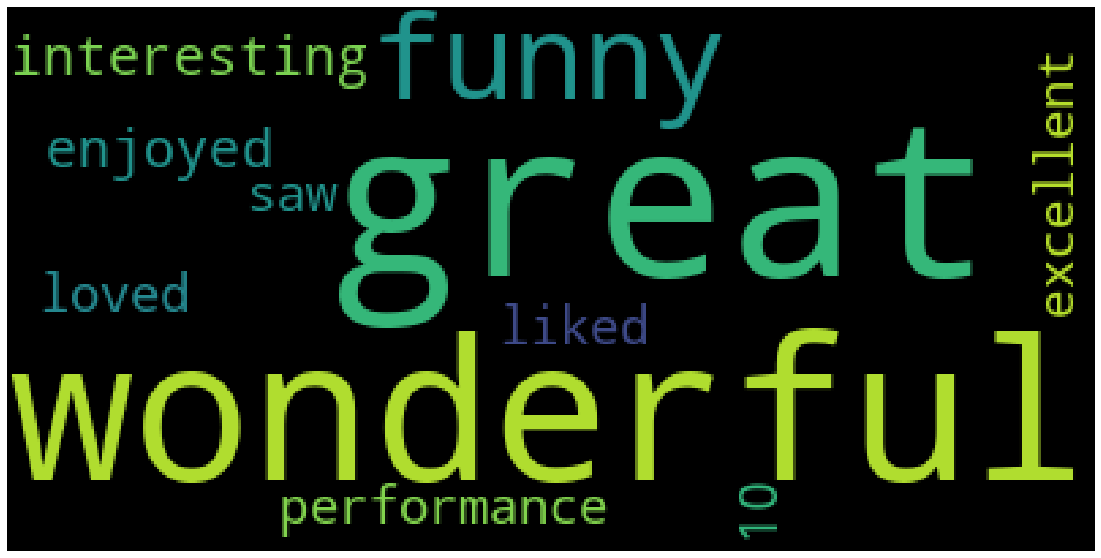

In [37]:
# word cloud

coef = np.array(clf.coef_)
positive_idx = np.where( coef > .4 )[1]
negative_idx = np.where( coef < -0.4 )[1]
features = vectorizer.get_feature_names()

pos_freq = dict(list(map(lambda idx: (features[idx], coef[0,idx]), positive_idx )))
neg_freq = dict(list(map(lambda idx: (features[idx], coef[0,idx]), negative_idx )))

from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(pos_freq)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

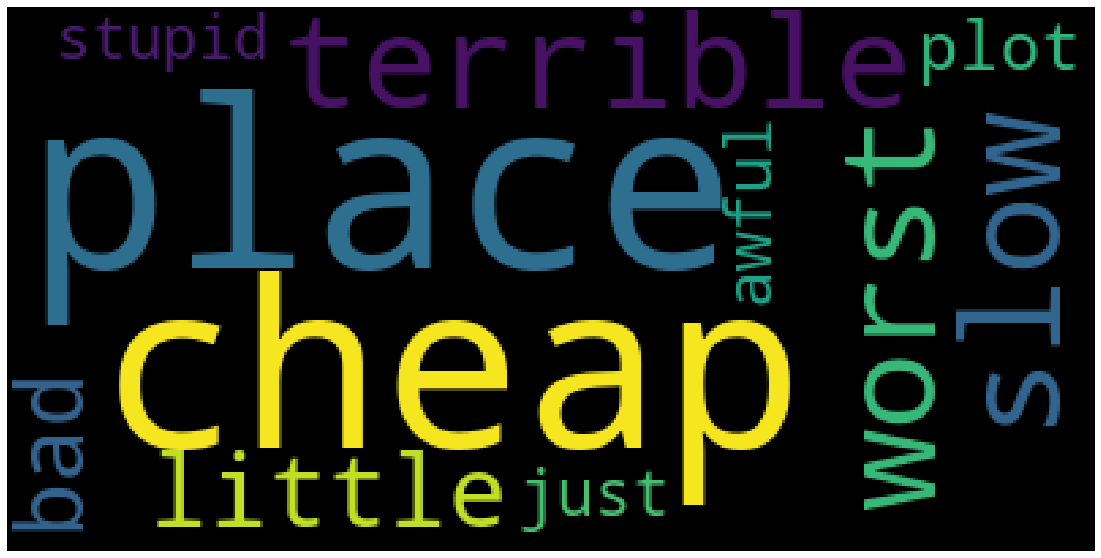

In [38]:
wordcloud = WordCloud().generate_from_frequencies(neg_freq)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")